<a href="https://colab.research.google.com/github/Pravallikavyas/Linear-Regression/blob/main/Copy_of_Assignment5_6_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sklearn
from sklearn import linear_model

# Assignment5


## Ground Cricket Chirps

In _The Song of Insects_ (1948) by George W. Pierce, Pierce mechanically measured the frequency (the number of wing vibrations per second) of chirps (or pulses of sound) made by a striped ground cricket, at various ground temperatures.  Since crickets are ectotherms (cold-blooded), the rate of their physiological processes and their overall metabolism are influenced by temperature.  Consequently, there is reason to believe that temperature would have a profound effect on aspects of their behavior, such as chirp frequency.

In general, it was found that crickets did not sing at temperatures colder than 60º F. or warmer than 100º F.

In [ ]:
ground_cricket_data = {"Chirps/Second": [20.0, 16.0, 19.8, 18.4, 17.1, 15.5, 14.7,
                                         15.7, 15.4, 16.3, 15.0, 17.2, 16.0, 17.0,
                                         14.4],
                       "Ground Temperature": [88.6, 71.6, 93.3, 84.3, 80.6, 75.2, 69.7,
                                              71.6, 69.4, 83.3, 79.6, 82.6, 80.6, 83.5,
                                              76.3]}
df1 = pd.DataFrame(ground_cricket_data)
df1

,Chirps/Second,Ground Temperature
0,20.0,88.6
1,16.0,71.6
2,19.8,93.3
3,18.4,84.3
4,17.1,80.6
5,15.5,75.2
6,14.7,69.7
7,15.7,71.6
8,15.4,69.4
9,16.3,83.3


In [ ]:
df1.shape

(15, 2)

In [ ]:
df1.describe()

,Chirps/Second,Ground Temperature
count,15.000000,15.000000
mean,16.566667,79.346667
std,1.712837,7.020467
min,14.400000,69.400000
25%,15.450000,73.400000
50%,16.000000,80.600000
75%,17.150000,83.400000
max,20.000000,93.300000


In [ ]:
df1.isnull().sum()

Chirps/Second         0
Ground Temperature    0
dtype: int64

In [ ]:
df1=df1.drop_duplicates()
df1.shape

(15, 2)

In [ ]:
df1.dtypes

Chirps/Second         float64
Ground Temperature    float64
dtype: object

In [ ]:
iqr=df1["Ground Temperature"].quantile(0.75)-df1["Ground Temperature"].quantile(0.25)
upper_threshold=df1["Ground Temperature"].quantile(0.75)+(1.5*iqr)
lower_threshold=df1["Ground Temperature"].quantile(0.25)-(1.5*iqr)
print(upper_threshold)
print(lower_threshold)

98.4
58.400000000000006


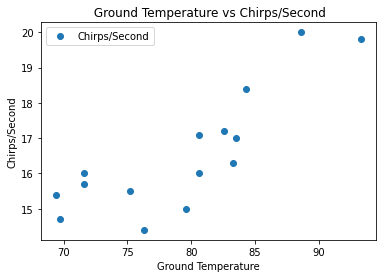

In [ ]:
df1.plot(x="Ground Temperature",y="Chirps/Second",style="o")
plt.title(" Ground Temperature vs Chirps/Second")
plt.xlabel("Ground Temperature")
plt.ylabel("Chirps/Second")
plt.show()

In [ ]:
df1.corr()

,Chirps/Second,Ground Temperature
Chirps/Second,1.000000,0.832042
Ground Temperature,0.832042,1.000000


In [28]:
X=df1.loc[:,['Ground Temperature']].values
y=df1.loc[:,"Chirps/Second"].values
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)

In [29]:
X_train.shape,X_test.shape

((10, 1), (5, 1))

In [30]:
X_test

array([[93.3],
       [75.2],
       [69.4],
       [88.6],
       [76.3]])

In [31]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression()

In [32]:
print(regressor.intercept_)

5.344618038231815


In [33]:
print(regressor.coef_)

[0.13964163]


In [43]:
regressor.predict([[88.6]])

array([17.71686647])

In [35]:
y_pred=regressor.predict(X_test)
y_pred

array([18.37318214, 15.84566863, 15.03574717, 17.71686647, 15.99927442])

In [36]:
c1=pd.DataFrame({'Actual':y_test,'Predicted':y_pred})
c1

,Actual,Predicted
0,19.8,18.373182
1,15.5,15.845669
2,15.4,15.035747
3,20.0,17.716866
4,14.4,15.999274


In [46]:
#y(chirps/second)=(2.82)x(ground temperature)+34.19  is the linear equation of the data
x=(18-regressor.intercept_)/regressor.coef_  #Interpolation of data
x

array([90.62757248])

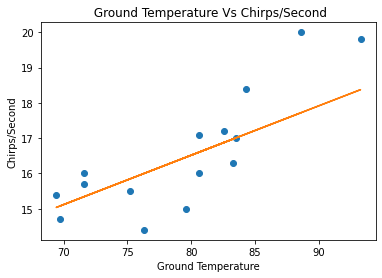

In [39]:
y_pred = regressor.predict(X) 
plt.plot(X, y, 'o')
plt.title(' Ground Temperature Vs Chirps/Second')
plt.xlabel('Ground Temperature')
plt.ylabel('Chirps/Second')
plt.plot(X, y_pred)

In [64]:
regressor.predict([[95]]) #Extrapolation of data

array([24.83425634])

In [65]:
from sklearn import metrics
regressor.score(X_test,y_test)

0.5756771109757575

### Tasks

1. Find the linear regression equation for this data.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)
4. Extrapolate data:  If the ground temperature reached 95, then at what approximate rate would you expect the crickets to be chirping?
5. Interpolate data:  With a listening device, you discovered that on a particular morning the crickets were chirping at a rate of 18 chirps per second.  What was the approximate ground temperature that morning? 

# Assignment6

## Brain vs. Body Weight

In the file `brain_body.txt`, the average brain and body weight for a number of mammal species are recorded. Load this data into a Pandas data frame.

### Tasks

1. Find the linear regression equation for this data for brain weight to body weight.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)

In [ ]:
df2= pd.read_fwf("/content/drive/MyDrive/Copy of brain_body.txt")
df2

,Brain,Body
0,3.385,44.5
1,0.480,15.5
2,1.350,8.1
3,465.000,423.0
4,36.330,119.5
...,...,...
57,160.000,169.0
58,0.900,2.6
59,1.620,11.4
60,0.104,2.5


In [ ]:
df2.head()

,Brain,Body
0,3.385,44.5
1,0.480,15.5
2,1.350,8.1
3,465.000,423.0
4,36.330,119.5


In [ ]:
x = df2['Brain']
x = x.to_frame()
y = df2['Body']

In [ ]:
print(df2.shape)

(62, 2)


In [ ]:
df2.describe()

,Brain,Body
count,62.000000,62.000000
mean,198.789984,283.134194
std,899.158011,930.278942
min,0.005000,0.140000
25%,0.600000,4.250000
50%,3.342500,17.250000
75%,48.202500,166.000000
max,6654.000000,5712.000000


In [ ]:
iqr = df2['Brain'].quantile(0.75) - df2['Brain'].quantile(0.25)
upper_threshold = df2['Brain'].quantile(0.75) + (1.5 * iqr)
lower_threshold = df2['Brain'].quantile(0.25) - (1.5 * iqr)
upper_threshold,lower_threshold

(119.60625, -70.80375000000001)

In [ ]:
df2["Brain"]=df2["Brain"].clip(-70,119)

In [ ]:
iqr = df2['Body'].quantile(0.75) - df2['Body'].quantile(0.25)
upper_threshold = df2['Body'].quantile(0.75) + (1.5 * iqr)
lower_threshold = df2['Body'].quantile(0.25) - (1.5 * iqr)
upper_threshold,lower_threshold

(408.625, -238.375)

In [ ]:
df2["Body"]=df2["Body"].clip(-238,408)

In [ ]:
df2.isnull().sum()

Brain    0
Body     0
dtype: int64

In [ ]:
df2=df2.drop_duplicates()

In [ ]:
df2.dtypes

Brain    float64
Body     float64
dtype: object

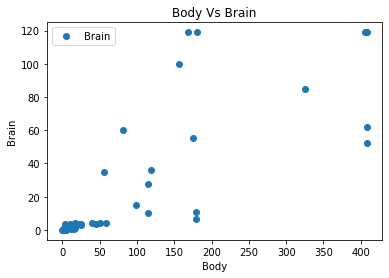

In [50]:
df2.plot(x="Body",y="Brain",style="o")
plt.title("Body Vs Brain")
plt.xlabel("Body")
plt.ylabel("Brain")
plt.show()

In [51]:
df2.corr()

,Brain,Body
Brain,1.000000,0.799397
Body,0.799397,1.000000


In [52]:
df2.Body.values

array([4.450e+01, 1.550e+01, 8.100e+00, 4.080e+02, 1.195e+02, 1.150e+02,
       9.820e+01, 5.500e+00, 5.800e+01, 6.400e+00, 4.000e+00, 5.700e+00,
       6.600e+00, 1.400e-01, 1.000e+00, 1.080e+01, 1.230e+01, 6.300e+00,
       3.000e-01, 3.500e+00, 1.150e+02, 2.560e+01, 5.000e+00, 1.750e+01,
       4.060e+02, 3.250e+02, 1.230e+01, 4.080e+02, 3.900e+00, 1.790e+02,
       5.600e+01, 1.700e+01, 1.000e+00, 4.000e-01, 2.500e-01, 1.250e+01,
       1.210e+01, 1.750e+02, 1.570e+02, 4.080e+02, 1.795e+02, 2.400e+00,
       8.100e+01, 2.100e+01, 3.920e+01, 1.900e+00, 1.200e+00, 3.000e+00,
       3.300e-01, 1.800e+02, 2.500e+01, 1.690e+02, 2.600e+00, 1.140e+01,
       2.500e+00, 5.040e+01])

In [53]:
X = df2.loc[:, ['Body']].values
y = df2.loc[:, 'Brain'].values
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [54]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression() 
regressor.fit(X_train, y_train) 

LinearRegression()

In [55]:
print(regressor.intercept_)

0.35832476635141575


In [56]:
print(regressor.coef_)

[0.25764139]


In [57]:
#y(brain weight)=2.43*(body weight)+20.83 is the equation of linear equation

In [58]:
regressor.predict([[9.4]])

array([2.78015379])

In [59]:
x=(50-regressor.intercept_)/regressor.coef_ 
x

array([192.67741177])

In [60]:
y_pred = regressor.predict(X_test)
y_pred

array([  1.98146549,   4.867049  ,   1.82688066,   0.39439456,
         0.46138132,   3.57884208,   0.43561718,  40.80802222,
        14.78624233,  45.44556715, 105.47600986,   1.38889031,
         0.61596615,   1.77535238,   6.79935939,   3.47578553,
         3.29543656])

In [61]:
f = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
f

,Actual,Predicted
0,1.700,1.981465
1,1.410,4.867049
2,0.920,1.826881
3,0.005,0.394395
4,0.023,0.461381
5,1.400,3.578842
6,0.023,0.435617
7,100.000,40.808022
8,35.000,14.786242
9,55.500,45.445567


In [62]:
regressor.score(X_test,y_test)

0.5756771109757575

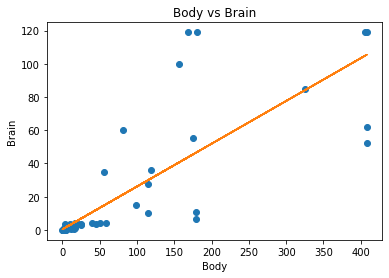

In [63]:
y_pred = regressor.predict(X) 
plt.plot(X, y, 'o')
plt.title('Body vs Brain')
plt.xlabel('Body')
plt.ylabel('Brain')
plt.plot(X,y_pred)

# Assignment7

## Salary Discrimination

The file `salary.txt` contains data for 52 tenure-track professors at a small Midwestern college. This data was used in legal proceedings in the 1980s about discrimination against women in salary.

The data in the file, by column:

1. Sex. 1 for female, 0 for male.
2. Rank. 1 for assistant professor, 2 for associate professor, 3 for full professor.
3. Year. Number of years in current rank.
4. Degree. Highest degree. 1 for doctorate, 0 for master's.
5. YSdeg. Years since highest degree was earned.
6. Salary. Salary/year in dollars.

### Tasks

1. Find the linear regression equation for this data using columns 1-5 to column 6.
2. Find the selection of columns with the best $R^2$ score.
3. Report whether sex is a factor in salary.

In [67]:
df = pd.read_fwf("/content/drive/MyDrive/Copy of salary.txt",names=["Sex", "Rank", "Year", "Degree", "YSdeg", "Salary"])
df

,Sex,Rank,Year,Degree,YSdeg,Salary
0,0,3,25,1,35,36350
1,0,3,13,1,22,35350
2,0,3,10,1,23,28200
3,1,3,7,1,27,26775
4,0,3,19,0,30,33696
5,0,3,16,1,21,28516
6,1,3,0,0,32,24900
7,0,3,16,1,18,31909
8,0,3,13,0,30,31850
9,0,3,13,0,31,32850


In [68]:
print(df.shape)

(52, 6)


In [69]:
df.describe()

,Sex,Rank,Year,Degree,YSdeg,Salary
count,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000
mean,0.269231,2.038462,7.480769,0.653846,16.115385,23797.653846
std,0.447888,0.862316,5.507536,0.480384,10.222340,5917.289154
min,0.000000,1.000000,0.000000,0.000000,1.000000,15000.000000
25%,0.000000,1.000000,3.000000,0.000000,6.750000,18246.750000
50%,0.000000,2.000000,7.000000,1.000000,15.500000,23719.000000
75%,1.000000,3.000000,11.000000,1.000000,23.250000,27258.500000
max,1.000000,3.000000,25.000000,1.000000,35.000000,38045.000000


In [70]:
df=df.drop_duplicates()

In [71]:
df.isnull().sum()

Sex       0
Rank      0
Year      0
Degree    0
YSdeg     0
Salary    0
dtype: int64

In [72]:
df.dtypes

Sex       int64
Rank      int64
Year      int64
Degree    int64
YSdeg     int64
Salary    int64
dtype: object

In [73]:
iqr = df.Salary.quantile(0.75) - df.Salary.quantile(0.25)
upper_threshold = df.Salary.quantile(0.75) + (1.5 * iqr)
lower_threshold = df.Salary.quantile(0.25) - (1.5 * iqr)
upper_threshold,lower_threshold

(40776.125, 4729.125)

In [74]:
df.Salary=df.Salary.clip(4729,40776)

In [75]:
df.shape

(52, 6)

In [76]:
df.groupby("Sex")["Salary"].mean()

Sex
0    24696.789474
1    21357.142857
Name: Salary, dtype: float64

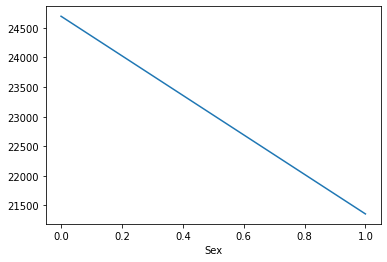

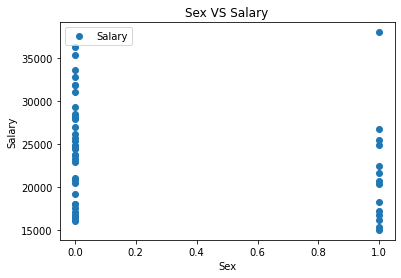

In [77]:
df.groupby("Sex")["Salary"].mean().plot()
df.plot(x="Sex", y="Salary", style='o')
plt.title('Sex VS Salary')
plt.xlabel('Sex')
plt.ylabel('Salary')
plt.show()

In [ ]:
df[['Sex','Salary']].corr()

,Sex,Salary
Sex,1.000000,-0.252782
Salary,-0.252782,1.000000


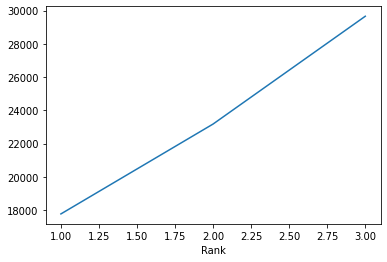

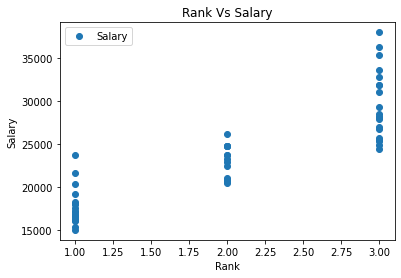

In [ ]:
df.groupby('Rank')['Salary'].mean().plot()
df.plot(x='Rank', y='Salary', style='o')
plt.title('Rank Vs Salary')
plt.xlabel('Rank')
plt.ylabel('Salary')
plt.show()

In [ ]:
df[['Rank','Salary']].corr()

,Rank,Salary
Rank,1.000000,0.867488
Salary,0.867488,1.000000


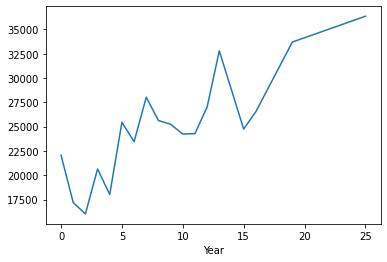

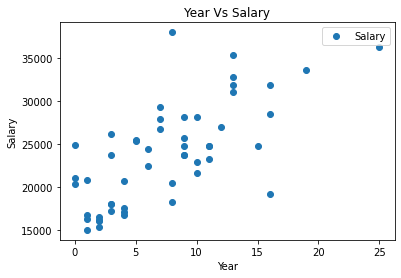

In [ ]:
df.groupby('Year')['Salary'].mean().plot()
df.plot(x='Year', y='Salary', style='o')
plt.title('Year Vs Salary')
plt.xlabel('Year')
plt.ylabel('Salary')
plt.show()

In [ ]:
df[['Year','Salary']].corr()

,Year,Salary
Year,1.000000,0.700669
Salary,0.700669,1.000000


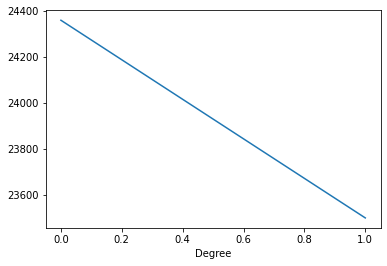

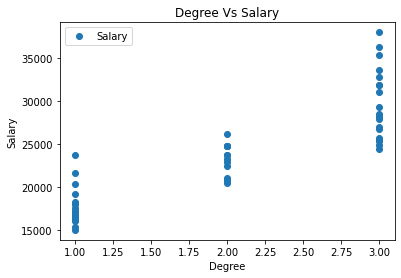

In [ ]:
df.groupby('Degree')['Salary'].mean().plot()
df.plot(x='Rank', y='Salary', style='o')
plt.title('Degree Vs Salary')
plt.xlabel('Degree')
plt.ylabel('Salary')
plt.show()

In [ ]:
df[['Degree','Salary']].corr()

,Degree,Salary
Degree,1.000000,-0.069726
Salary,-0.069726,1.000000


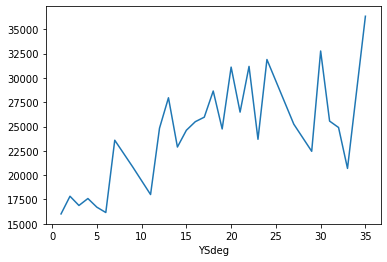

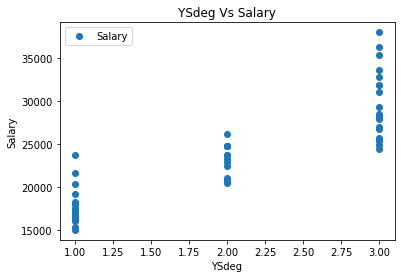

In [ ]:
df.groupby('YSdeg')['Salary'].mean().plot()
df.plot(x='Rank', y='Salary', style='o')
plt.title('YSdeg Vs Salary')
plt.xlabel('YSdeg')
plt.ylabel('Salary')
plt.show()

In [ ]:
df[['YSdeg','Salary']].corr()

,YSdeg,Salary
YSdeg,1.000000,0.674854
Salary,0.674854,1.000000


In [78]:
X = df[['Sex', 'Rank', 'Year','Degree','YSdeg']].values
y = df['Salary'].values 

In [79]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [80]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler() 
scaler.fit(X_train) 
X_train_scaled = scaler.transform(X_train) 
X_test_scaled = scaler.transform(X_test)

In [81]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train_scaled, y_train)

LinearRegression()

In [82]:
coeff_df = pd.DataFrame(regressor.coef_,['Sex', 'Rank', 'Year','Degree','YSdeg'],columns=['Coefficient'])
y_pred = regressor.predict(X_test_scaled)
coeff_df

,Coefficient
Sex,-54.534010
Rank,5054.933032
Year,2395.232795
Degree,-1374.611571
YSdeg,-2060.736799


In [83]:
regressor.intercept_

23700.805555555555

In [ ]:
#y(salary)=(730.66*Sex)+(4514.82*Rank)+(2743.11*Year)+(-356.28*Degree)+(-837.27*YSdeg)+(24327.08) is the linear eaquation

In [84]:
f1 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
f1

,Actual,Predicted
0,16700,17120.998167
1,28516,31563.677203
2,24742,27464.482736
3,15000,16419.033708
4,38045,27101.907739
5,24450,29773.970136
6,26775,26022.169286
7,23300,23981.847300
8,20300,15749.017070
9,28200,29127.030727


In [85]:
from sklearn import metrics
print('R2- SCORE:', metrics.r2_score(y_test,y_pred))

R2- SCORE: 0.6930741835358205
